In [ ]:
Summary

In [36]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [17]:
path = r'./data/' # use your path
all_csv = glob.glob(os.path.join(path, "*.csv"))

tweets = []

for filename in all_csv:
    df = pd.read_csv(filename, index_col=None, header=0)
    tweets.append(df)
    
tweets_df = pd.concat(tweets, axis=0, ignore_index=True)
tweets_df

,Unnamed: 0,tweet_id,tweet_text,language,tweet_created_at,retweet_count,favorite_count,hashtags,user_id,user_name,user_screen_name,user_loc,user_follower,friends_count,media
0,701,1323051948485070853,Este mes estaré participando en el #30DayMapCh...,es,2020-11-01 23:59:00,1,9,"[{'text': '30DayMapChallenge', 'indices': [35,...",1002117891133755392,José Molano-Pulido,JoseFMolano,NaN,259,435,[]
1,702,1323049303330508803,Added the Copake Memorial Clock to OSM. Local ...,en,2020-11-01 23:48:29,1,2,[],808007382081081344,Don Meltz AICP,Don_Meltz,"Stockport, Columbia County, NY",697,531,[]
2,703,1323049281566044160,#30DayMapChallenge\nって初めて知ったけど、30日間毎日、テーマに沿った地...,ja,2020-11-01 23:48:24,1,2,"[{'text': '30DayMapChallenge', 'indices': [0, ...",711103251945381888,vmconverter,vmconverter,日本 東京,380,295,[]
3,704,1323046291367100416,Antes de que acabe el día. Uno de mis primero...,es,2020-11-01 23:36:31,14,61,"[{'text': '30DayMapChallenge', 'indices': [83,...",384907052,Leticia Luna,Letyludigital,México,1114,2445,"[{'id': 1323046288888262657, 'id_str': '132304..."
4,705,1323043516629614595,We'll see if I stick with this #30DayMapChalle...,en,2020-11-01 23:25:29,2,15,"[{'text': '30DayMapChallenge', 'indices': [31,...",704329847896678400,Ross Thorn,RealRossThorn,Minnesota,323,482,"[{'id': 1323043340091330584, 'id_str': '132304..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,729,1323053462188396545,#30DayMapChallenge\nDía 1: Points / Puntos\nDi...,es,2020-11-02 00:05:01,2,2,"[{'text': '30DayMapChallenge', 'indices': [0, ...",1322588299744190466,Lizbeth Bastida,LizbethBastid11,NaN,1,30,http://pbs.twimg.com/media/ElxuHK4X0AEH0E-.jpg
751,730,1323053218167967744,min and max distances from null island - #30Da...,en,2020-11-02 00:04:03,1,6,"[{'text': '30DayMapChallenge', 'indices': [41,...",4669435267,Justin Meyers,MapMakinMeyers,"y,x",1447,4269,http://pbs.twimg.com/media/Elxte4BXYAIVA6S.jpg
752,731,1323053176724082688,#30DayMapChallenge Day 2 | Lines\n\nIn 2015/16...,en,2020-11-02 00:03:53,2,15,"[{'text': '30DayMapChallenge', 'indices': [0, ...",2614024302,Rob Radburn,robradburn,"Leicester, UK",3179,748,http://pbs.twimg.com/media/Elxt2IoWoAAbuJp.jpg
753,732,1323053173066600448,#30DayMapChallenge Day 01 Theme: Point\n\nFirs...,pt,2020-11-02 00:03:52,1,3,"[{'text': '30DayMapChallenge', 'indices': [0, ...",794995039457918977,Rodrigo Ferrão,rod_ferrao,NaN,281,1432,http://pbs.twimg.com/media/ElxtopRWoAATUjD.jpg


In [24]:
tweets_df['date'] = tweets_df['tweet_created_at'].str[:10]

In [25]:
tweets_df

,Unnamed: 0,tweet_id,tweet_text,language,tweet_created_at,retweet_count,favorite_count,hashtags,user_id,user_name,user_screen_name,user_loc,user_follower,friends_count,media,date
0,701,1323051948485070853,Este mes estaré participando en el #30DayMapCh...,es,2020-11-01 23:59:00,1,9,"[{'text': '30DayMapChallenge', 'indices': [35,...",1002117891133755392,José Molano-Pulido,JoseFMolano,NaN,259,435,[],2020-11-01
1,702,1323049303330508803,Added the Copake Memorial Clock to OSM. Local ...,en,2020-11-01 23:48:29,1,2,[],808007382081081344,Don Meltz AICP,Don_Meltz,"Stockport, Columbia County, NY",697,531,[],2020-11-01
2,703,1323049281566044160,#30DayMapChallenge\nって初めて知ったけど、30日間毎日、テーマに沿った地...,ja,2020-11-01 23:48:24,1,2,"[{'text': '30DayMapChallenge', 'indices': [0, ...",711103251945381888,vmconverter,vmconverter,日本 東京,380,295,[],2020-11-01
3,704,1323046291367100416,Antes de que acabe el día. Uno de mis primero...,es,2020-11-01 23:36:31,14,61,"[{'text': '30DayMapChallenge', 'indices': [83,...",384907052,Leticia Luna,Letyludigital,México,1114,2445,"[{'id': 1323046288888262657, 'id_str': '132304...",2020-11-01
4,705,1323043516629614595,We'll see if I stick with this #30DayMapChalle...,en,2020-11-01 23:25:29,2,15,"[{'text': '30DayMapChallenge', 'indices': [31,...",704329847896678400,Ross Thorn,RealRossThorn,Minnesota,323,482,"[{'id': 1323043340091330584, 'id_str': '132304...",2020-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,729,1323053462188396545,#30DayMapChallenge\nDía 1: Points / Puntos\nDi...,es,2020-11-02 00:05:01,2,2,"[{'text': '30DayMapChallenge', 'indices': [0, ...",1322588299744190466,Lizbeth Bastida,LizbethBastid11,NaN,1,30,http://pbs.twimg.com/media/ElxuHK4X0AEH0E-.jpg,2020-11-02
751,730,1323053218167967744,min and max distances from null island - #30Da...,en,2020-11-02 00:04:03,1,6,"[{'text': '30DayMapChallenge', 'indices': [41,...",4669435267,Justin Meyers,MapMakinMeyers,"y,x",1447,4269,http://pbs.twimg.com/media/Elxte4BXYAIVA6S.jpg,2020-11-02
752,731,1323053176724082688,#30DayMapChallenge Day 2 | Lines\n\nIn 2015/16...,en,2020-11-02 00:03:53,2,15,"[{'text': '30DayMapChallenge', 'indices': [0, ...",2614024302,Rob Radburn,robradburn,"Leicester, UK",3179,748,http://pbs.twimg.com/media/Elxt2IoWoAAbuJp.jpg,2020-11-02
753,732,1323053173066600448,#30DayMapChallenge Day 01 Theme: Point\n\nFirs...,pt,2020-11-02 00:03:52,1,3,"[{'text': '30DayMapChallenge', 'indices': [0, ...",794995039457918977,Rodrigo Ferrão,rod_ferrao,NaN,281,1432,http://pbs.twimg.com/media/ElxtopRWoAATUjD.jpg,2020-11-02


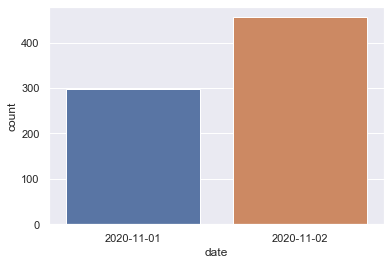

In [38]:
sns.set_theme()

sns.countplot(x="date", data=tweets_df)

plt.savefig("./graphs/maps_count.png")